In [239]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [169]:
df = pd.read_csv('StockX-Data-Contest-2019-3.csv')

In [170]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [171]:
yzy = df[df['Brand'] == ' Yeezy']

In [172]:
ofw = df[df['Brand'] != ' Yeezy']

In [173]:
yzy_p_nd = yzy.loc[:,:]
sp = [float(x[1:].replace(',', '')) for x in list(yzy['Sale Price'])]
yzy_p_nd['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(yzy['Retail Price'])]
yzy_p_nd['Retail Price'] = rp

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [175]:
ofw_p_nd = ofw.loc[:,:]
sp = [float(x[1:].replace(',', '')) for x in list(ofw['Sale Price'])]
ofw_p_nd['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(ofw['Retail Price'])]
ofw_p_nd['Retail Price'] = rp

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Line Chart

In [211]:
yzy_p_nd.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island


In [213]:
yzy_p_nd['Order Date'] = pd.to_datetime(yzy_p_nd['Order Date'])

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
yzy_unq = yzy_p_nd.drop_duplicates('Order Date', ignore_index=True)

In [215]:
yzy_unq_lm = yzy_unq[yzy_unq['Order Date'] > '2019-01-01']

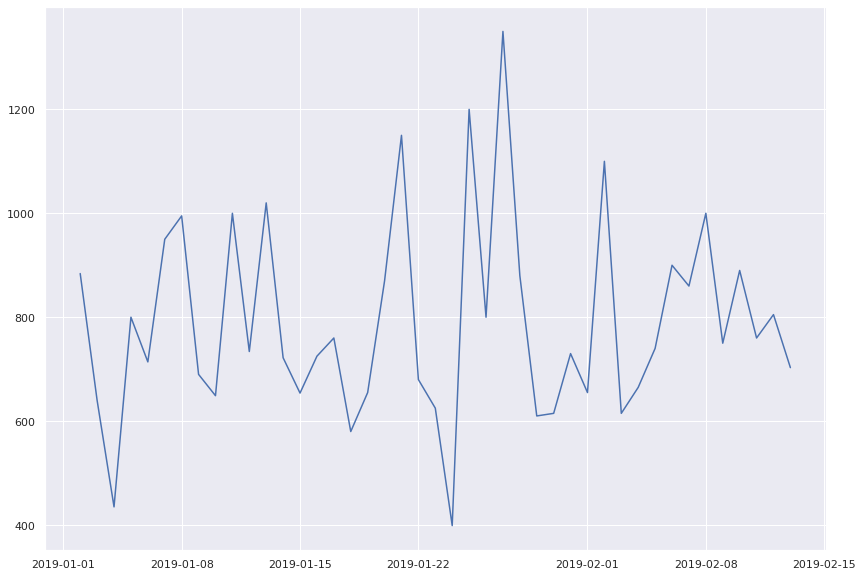

In [216]:
#line chart
plt.rcParams['figure.figsize'] = (14,10)

df_plt = yzy_unq_lm[['Sale Price']].set_index(yzy_unq_lm['Order Date'].values, drop=True)
plt.plot(df_plt['Sale Price'])

# Bar Charts
I'll plot how many yeezy sneakers were sold in StockX since the platform started, by name of the sneaker

In [84]:
yzy_count = yzy.groupby(['Sneaker Name']).count()
yzy_count.head()

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
Sneaker Name,,,,,,,
Adidas-Yeezy-Boost-350-Low-Moonrock,100,100,100,100,100,100,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70,70,70,70,70,70,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95,95,95,95,95,95,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122,122,122,122,122,122,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68,68,68,68,68,68,68


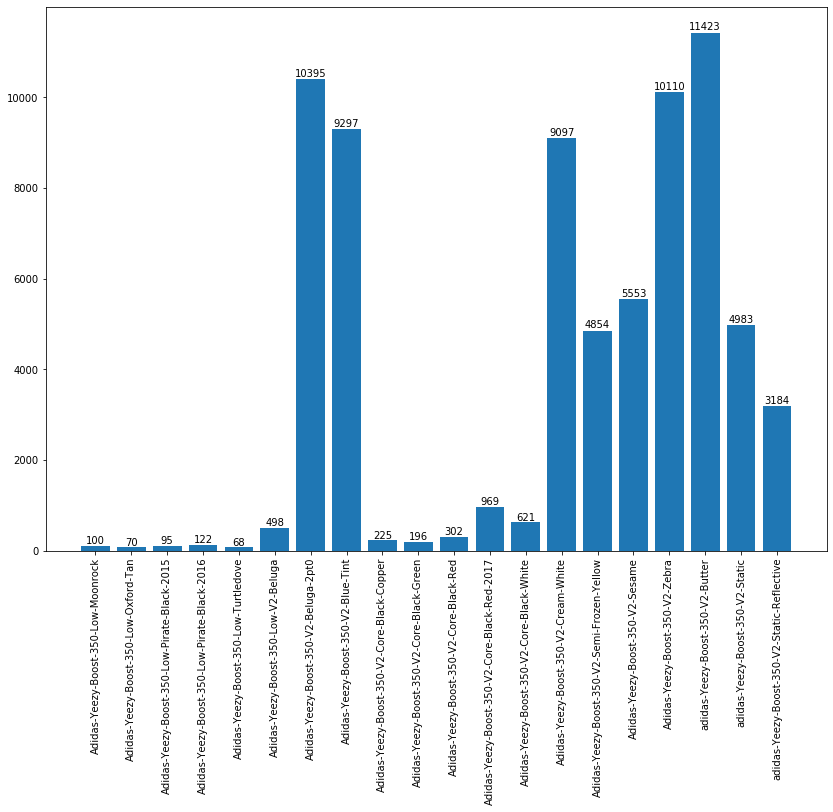

In [101]:
#Bar plot of yeezys sell
figure, axis = plt.subplots()
plt.xticks(range(len(yzy_count.index)), list(yzy_count.index), rotation = 90)
plot = axis.bar(yzy_count.index, yzy_count['Order Date'])
for rectangle in plot:
    height = rectangle.get_height()
    axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 *
        height, '%d' % int(height), ha='center', va = 'bottom')

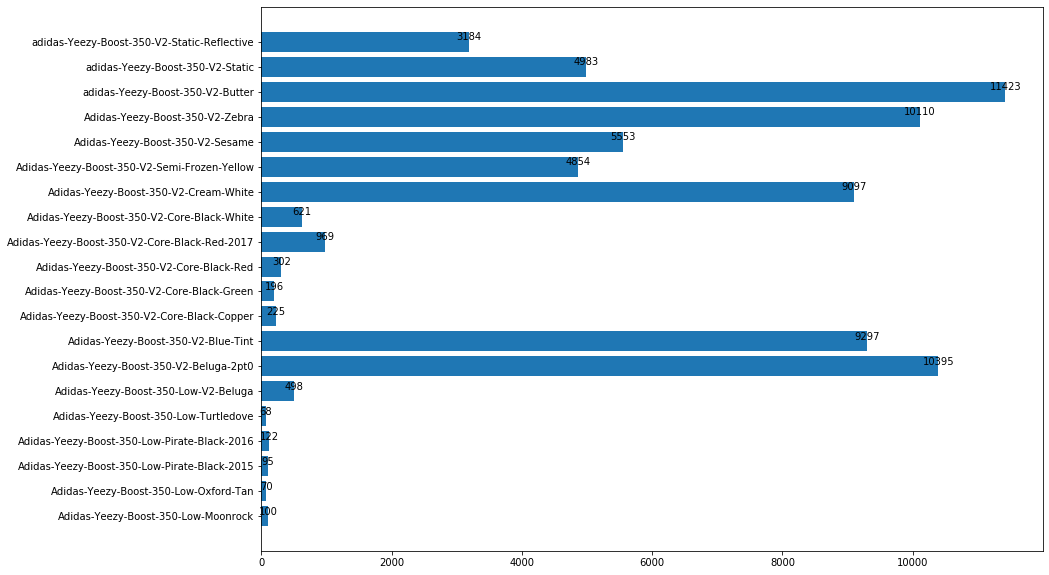

In [102]:
#Horizontal
figure, axis = plt.subplots()
plt.yticks(range(len(yzy_count.index)), list(yzy_count.index), rotation = 0)
plot = axis.barh(yzy_count.index, yzy_count['Order Date'])
for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width),
        ha='center', va = 'bottom')

# Scatterplots

In [176]:
set(yzy['Sneaker Name'].values)

{'Adidas-Yeezy-Boost-350-Low-Moonrock',
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
 'Adidas-Yeezy-Boost-350-Low-Turtledove',
 'Adidas-Yeezy-Boost-350-Low-V2-Beluga',
 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
 'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
 'Adidas-Yeezy-Boost-350-V2-Cream-White',
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
 'Adidas-Yeezy-Boost-350-V2-Sesame',
 'Adidas-Yeezy-Boost-350-V2-Zebra',
 'adidas-Yeezy-Boost-350-V2-Butter',
 'adidas-Yeezy-Boost-350-V2-Static',
 'adidas-Yeezy-Boost-350-V2-Static-Reflective'}

In [177]:
import seaborn as sns

In [185]:
yzy_350v2bc = yzy_p_nd[(yzy_p_nd['Sneaker Name'] == 'adidas-Yeezy-Boost-350-V2-Butter') | (yzy_p_nd['Sneaker Name'] == 'Adidas-Yeezy-Boost-350-V2-Cream-White')] 

In [186]:
yzy_350v2bc.reset_index(drop=True, inplace=True)

In [187]:
yzy_350v2bc['Sale Price']

0        460.0
1        465.0
2        465.0
3        515.0
4        473.0
         ...  
20515    250.0
20516    230.0
20517    240.0
20518    250.0
20519    279.0
Name: Sale Price, Length: 20520, dtype: float64

In [189]:
yzy_350v2bc['Sneaker Name'] = yzy_350v2bc['Sneaker Name'].map({'Adidas-Yeezy-Boost-350-V2-Cream-White': 0,
                                                              'adidas-Yeezy-Boost-350-V2-Butter': 1})

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Sale Price of the Shoe')

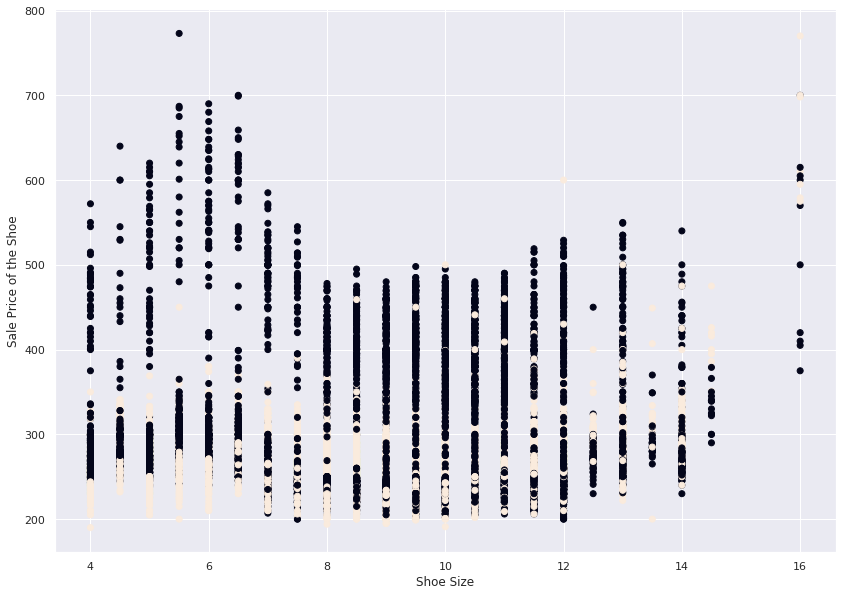

In [191]:
sns.set()
plt.scatter(x=yzy_350v2b['Shoe Size'], y=yzy_350v2b['Sale Price'], c = yzy_350v2bc['Sneaker Name'])
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price of the Shoe')

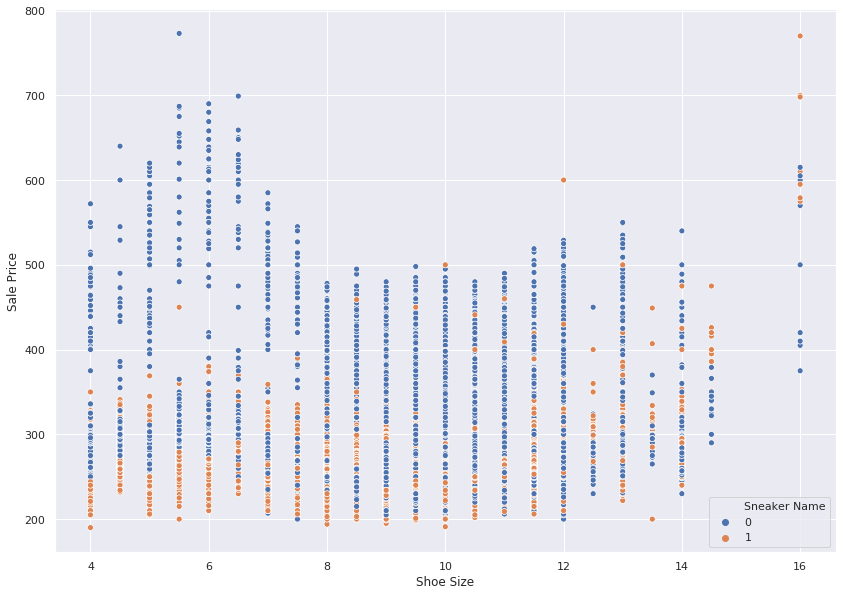

In [194]:
sns.scatterplot(x=yzy_350v2bc['Shoe Size'], y=yzy_350v2bc['Sale Price'], hue=yzy_350v2bc['Sneaker Name'], 
                data=yzy_350v2bc)

# Area and stacked plot

In [208]:
yzy_p_nd['Order Date'] = pd.to_datetime(yzy_p_nd['Order Date'])

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
yzy_ap = yzy_p_nd[yzy_p_nd['Sneaker Name'].isin(['adidas-Yeezy-Boost-350-V2-Static-Reflective',  'adidas-Yeezy-Boost-350-V2-Static'])]

In [217]:
yzy_ap_lm = yzy_ap[yzy_ap['Order Date'] >= '2019-01-01']

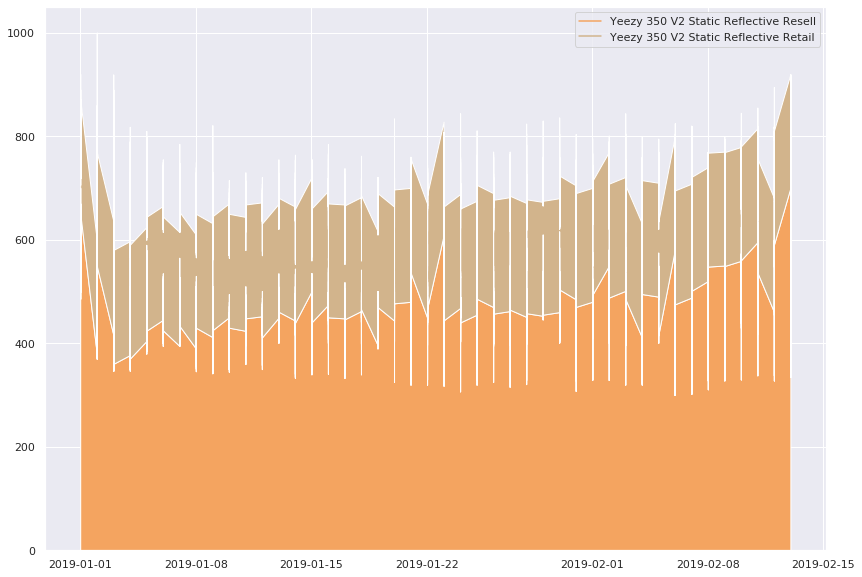

In [229]:
plt.plot([],[], color='sandybrown', label='Yeezy 350 V2 Static Reflective Resell')
plt.plot([],[], color='tan', label='Yeezy 350 V2 Static Reflective Retail')

plt.stackplot(yzy_ap_lm[yzy_ap_lm['Sneaker Name'] == 'adidas-Yeezy-Boost-350-V2-Static-Reflective']['Order Date'], 
              yzy_ap_lm[yzy_ap_lm['Sneaker Name'] == 'adidas-Yeezy-Boost-350-V2-Static-Reflective']['Sale Price'],
              yzy_ap_lm[yzy_ap_lm['Sneaker Name'] == 'adidas-Yeezy-Boost-350-V2-Static-Reflective']['Retail Price'],
             colors =['sandybrown', 'tan'])
plt.legend()

# Pie Chart

In [231]:
yzy_count

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
Sneaker Name,,,,,,,
Adidas-Yeezy-Boost-350-Low-Moonrock,100,100,100,100,100,100,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70,70,70,70,70,70,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95,95,95,95,95,95,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122,122,122,122,122,122,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68,68,68,68,68,68,68
Adidas-Yeezy-Boost-350-Low-V2-Beluga,498,498,498,498,498,498,498
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395,10395,10395,10395,10395,10395,10395
Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297,9297,9297,9297,9297,9297,9297
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,225,225,225,225,225,225,225


(-1.1092453575484087,
 1.1143985350044059,
 -1.102605025773122,
 1.100124050883043)

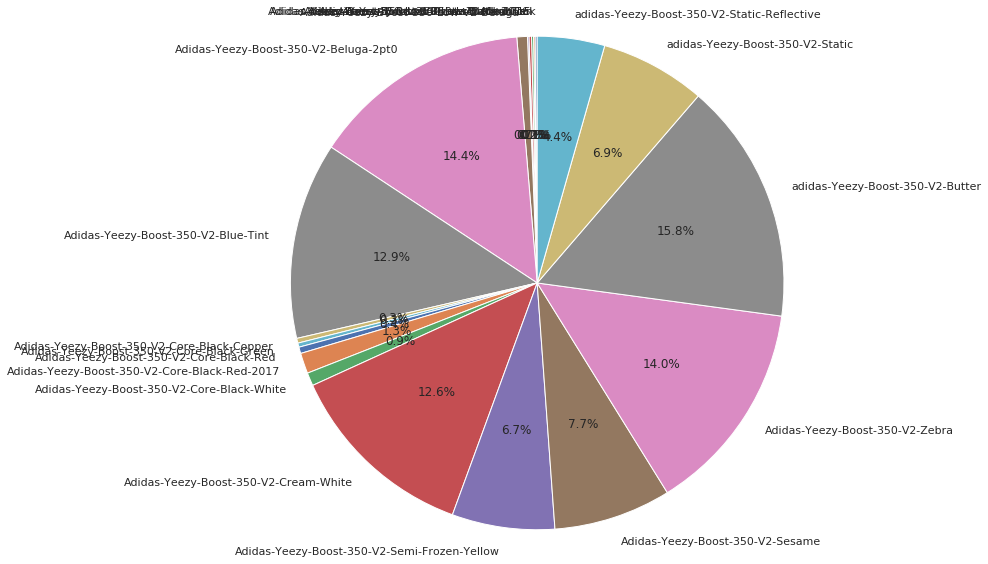

In [233]:
plt.pie(yzy_count['Order Date'], labels=yzy_count.index, shadow = False, startangle=90, autopct='%1.1f%%')
plt.axis('equal')

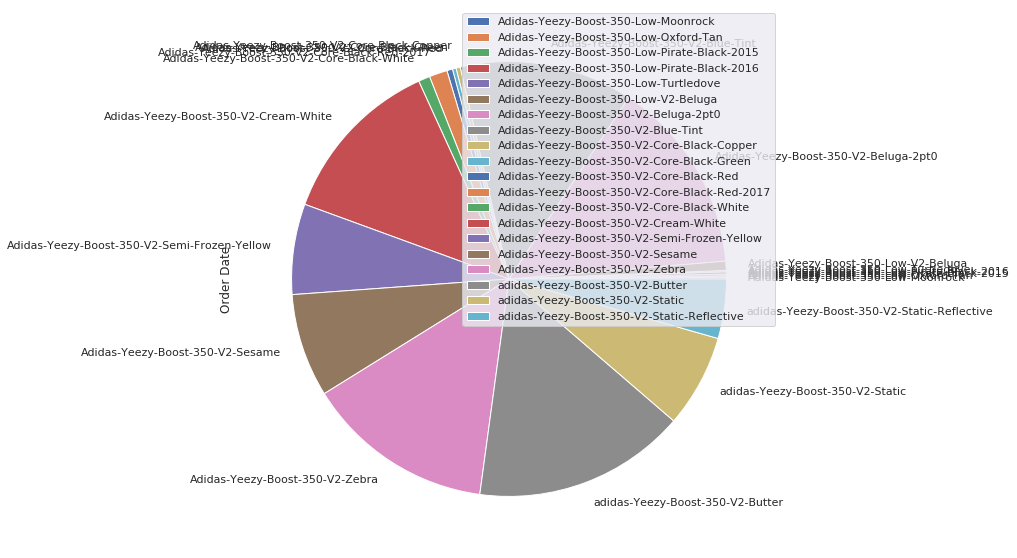

In [234]:
yzy_count.plot.pie(y='Order Date', figsize=(20,10))

# Table Chart

In [237]:
years = [2017, 2018]
useful_snkrs = ['Adidas-Yeezy-Boost-350-Low-V2-Beluga', 'Adidas-Yeezy-Boost-350-V2-Blue-Tint', 'Adidas-Yeezy-Boost-350-V2-Cream-White']

yzy_useful = yzy_p_nd[yzy_p_nd['Sneaker Name'].isin(useful_snkrs)]

values = []

for year in years:
    yzy_y = yzy_useful[yzy_useful['Order Date'].dt.year == year]
    yzy_y_c = yzy_y.groupby(['Sneaker Name']).count()
    values.append(yzy_y_c['Order Date'].values)

Text(0.5, 1.0, 'Number of Three Yeezy Sneakers Sold/Year')

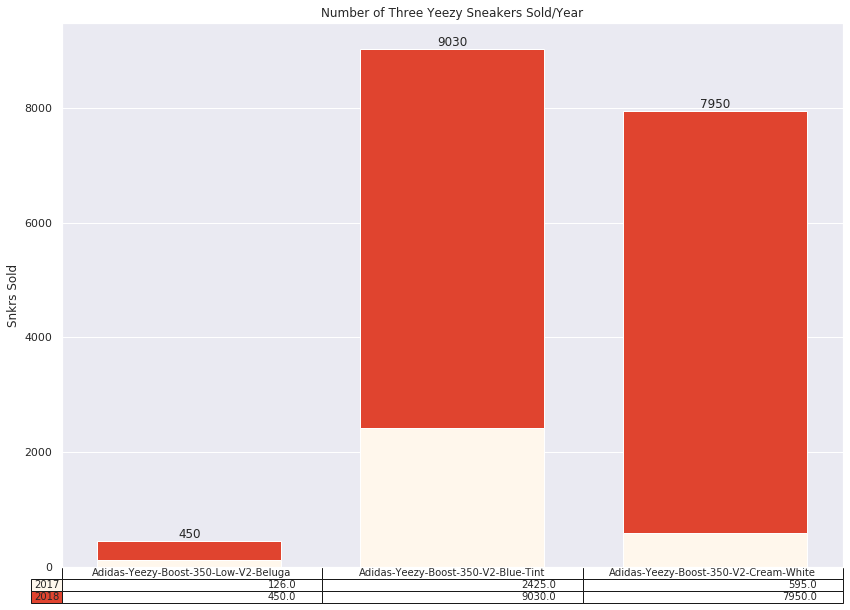

In [242]:
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(useful_snkrs)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(useful_snkrs))
fig, ax = plt.subplots()
cell_text = []
n_rows = len(values)

for row in range(n_rows):
    plot = plt.bar(index, values[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + values[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d'% int(y_offset[i]),ha='center', va='bottom')
    i = i+1
    
the_table = plt.table(cellText=cell_text, rowLabels=years,
rowColours=colors, colLabels=useful_snkrs, loc='bottom')
plt.ylabel("Snkrs Sold")
plt.xticks([])
plt.title('Number of Three Yeezy Sneakers Sold/Year')

# Polar Chart

In [276]:
years = [2017, 2018, 2019]
useful_snkrs = ['adidas-Yeezy-Boost-350-V2-Static', 'Adidas-Yeezy-Boost-350-V2-Zebra', 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0', 'Adidas-Yeezy-Boost-350-V2-Blue-Tint', 'Adidas-Yeezy-Boost-350-V2-Cream-White']

yzy_useful = yzy_p_nd[yzy_p_nd['Sneaker Name'].isin(useful_snkrs)]

values = []

for year in years:
    yzy_y = yzy_useful[yzy_useful['Order Date'].dt.year == year]
    yzy_y_c = yzy_y.groupby(['Sneaker Name']).count()
    values.append(yzy_y_c['Order Date'].values)

sold17 = values[0]
sold18 = values[1]
sold19 = values[2]*5

Text(0.5, 1.05, "Yeezy's sold by year")

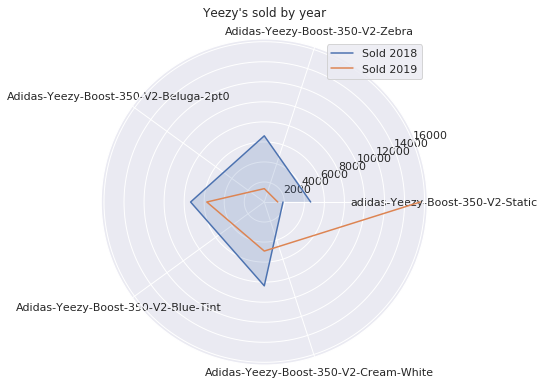

In [280]:
theta = np.linspace(0, 2 * np.pi, len(sold18))

plt.figure(figsize = (10,6))
plt.subplot(polar=True)

(lines,labels) = plt.thetagrids(range(0,360, int(360/len(useful_snkrs))), (useful_snkrs))


plt.plot(theta, sold18)
plt.fill(theta, sold18, 'b', alpha=0.2)
plt.plot(theta, sold19)

plt.legend(labels=('Sold 2018', 'Sold 2019'),loc=0)
plt.title("Yeezy's sold by year")


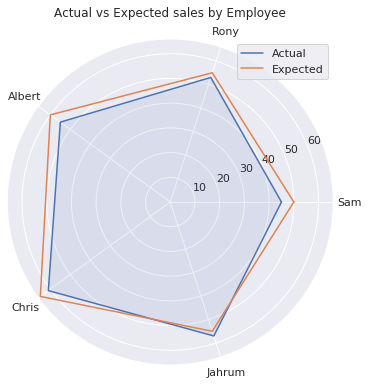

In [285]:
import matplotlib.pyplot as plt
import numpy as np

employee = ["Sam", "Rony", "Albert", "Chris", "Jahrum"]
actual = [45, 53, 55, 61, 57, 45]
expected = [50, 55, 60, 65, 55, 50]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(10, 6))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(actual))

# Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(employee))), (employee))

# Plot actual sales graph
plt.plot(theta, actual)
plt.fill(theta, actual, 'b', alpha=0.1)

# Plot expected sales graph
plt.plot(theta, expected)

# Add legend and title for the plot
plt.legend(labels=('Actual', 'Expected'), loc=1)
plt.title("Actual vs Expected sales by Employee")

# Dsiplay the plot on the screen
plt.show()



# Histogram

In [303]:
yzy_z = yzy_p_nd[yzy_p_nd['Sneaker Name'] == 'Adidas-Yeezy-Boost-350-V2-Zebra']

In [304]:
yzy_z.reset_index(inplace=True, drop=True)

In [305]:
yzy_z_19 = yzy_z[yzy_z['Order Date'].dt.year == 2019]

In [306]:
yzy_z_19.reset_index(inplace=True, drop=True)

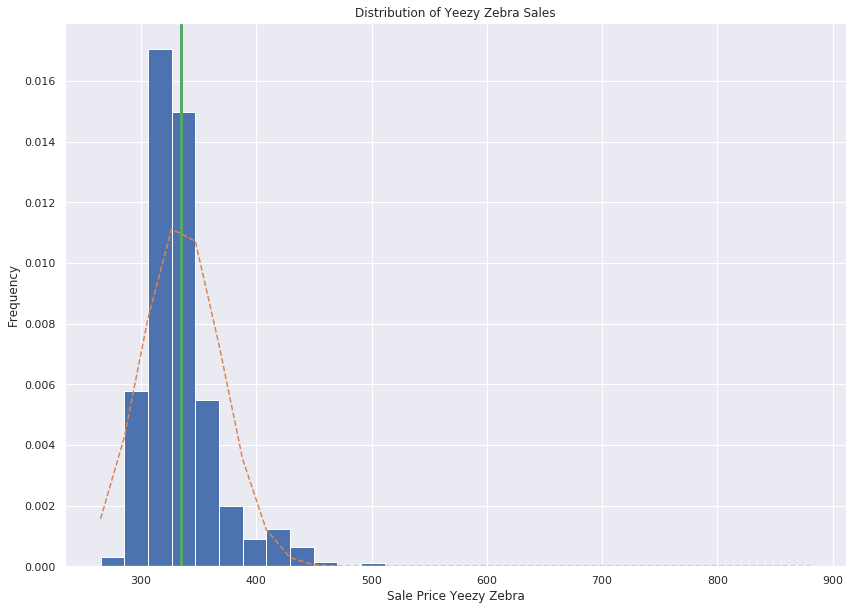

In [308]:
nbins=30
n, bins, patches = plt.hist(yzy_z_19['Sale Price'], bins=nbins, density=1)

plt.xlabel('Sale Price Yeezy Zebra')
plt.ylabel('Frequency')
plt.title('Distribution of Yeezy Zebra Sales')

plt.axvline(x=yzy_z_19['Sale Price'].mean(), linewidth=3, color='g')

mu = yzy_z_19['Sale Price'].mean()
sigma = yzy_z_19['Sale Price'].std()

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--')
plt.show()

# Lollipop Chart

In [310]:
yzy_count

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
Sneaker Name,,,,,,,
Adidas-Yeezy-Boost-350-Low-Moonrock,100,100,100,100,100,100,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70,70,70,70,70,70,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95,95,95,95,95,95,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122,122,122,122,122,122,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68,68,68,68,68,68,68
Adidas-Yeezy-Boost-350-Low-V2-Beluga,498,498,498,498,498,498,498
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395,10395,10395,10395,10395,10395,10395
Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297,9297,9297,9297,9297,9297,9297
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,225,225,225,225,225,225,225


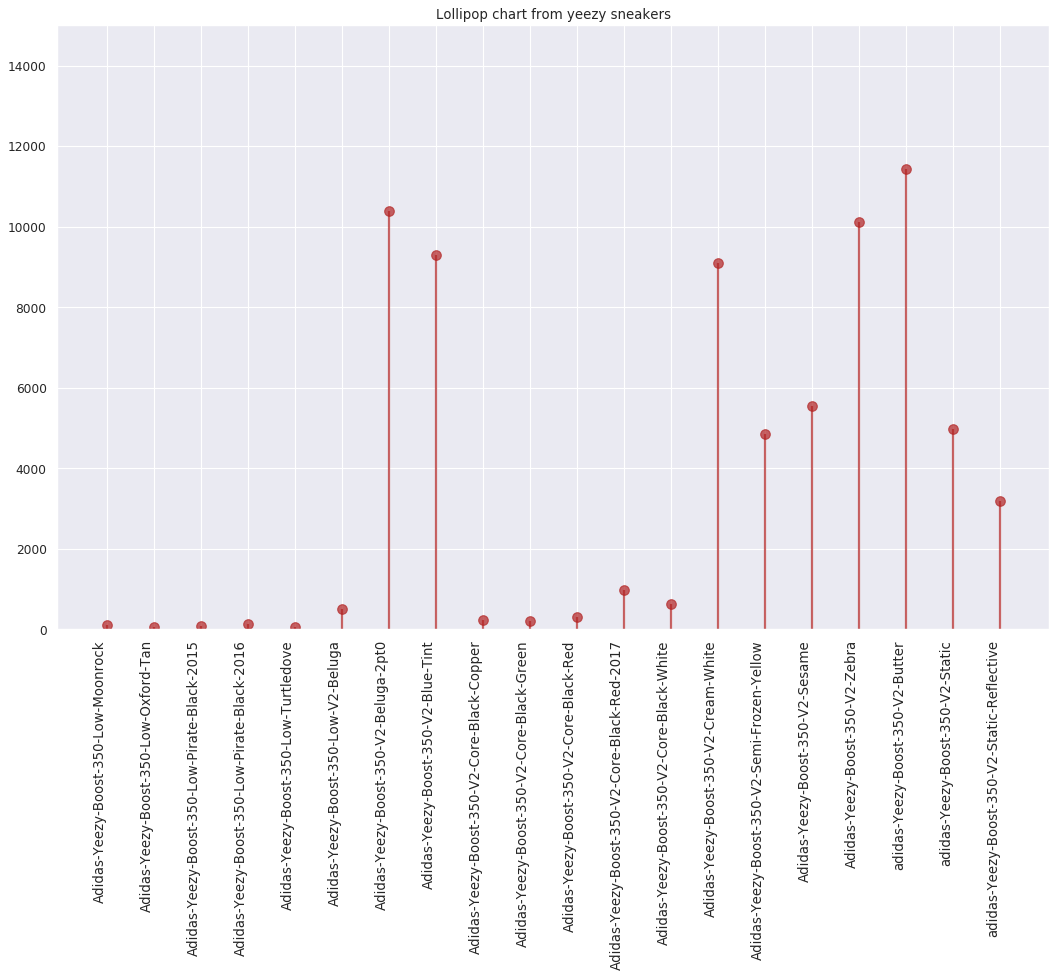

In [321]:
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.vlines(x=yzy_count.index, ymin=0, ymax=yzy_count['Order Date'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=yzy_count.index, y=yzy_count['Order Date'], s=75, color='firebrick', alpha=0.7)

ax.set_title('Lollipop chart from yeezy sneakers')
ax.set_xticks(yzy_count.index)
ax.set_xticklabels(yzy_count.index, rotation = 90, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,15000)

#for row in yzy_count[['Order Date']].itertuples():
#    ax.text(row.Index, row['Order Date']+.5, s=round(row['Order Date'], 2),
#            horizontalalignment= 'center', verticalalignment='bottom',
#            fontsize=14)
    
plt.show()